# Satelitengeodäsie - Übung 4

## Xeno Meienberg

### Aufgabe 1

Die Halbachse der Erdumlaufbahn beträgt 400'000 km ($a$). Die Umlaufzeit beträgt 27 Tage ($T$). Schätzen Sie die gesamte Masse des Erde-Mond-Systems ($G=6.673 \cdot 10^{-11}~m^3kg^{-1}s^{-2}$)

### Lösung Aufgabe 1:

Es gilt folgende Gleichung (3. Kepler Gesetz):

$$ C = \frac{T^2}{a^3} = \frac{4 \pi^2}{G(M+m)} = const. $$

welche aufgelöst nach $(M+m)$, also Masse des Erde-Mond-Systems ($M=$ Masse Erde, $m=$ Masse Mond ) folgende Gleichung gilt:

$$ M+m = \frac{4 \pi^2 \cdot a^3}{G \cdot T^2}$$

In [1]:
import math

a_1 = 400000*1000 #a [m]
T_1 = 27*24*60*60 #T [s]
G_1 = 6.673*10**(-11) #G [m3kg-1s-2]

M_m_1 = 4*(math.pi)**2*(a_1**3)/((T_1**2)*G_1)

print('Masse Erde-Mond-System:',M_m_1,'kg')


Masse Erde-Mond-System: 6.957665932652242e+24 kg


### Aufgabe 2

Für einen Sateliten, der sich um die Erde bewegt, sei die Umlaufzeit $T$ und die pro Zeiteinheit überstrichene Fläche $c$ gegeben:

$$ T = 8720~s $$
$$ c = 9.448 \cdot 10^{9}~m^2/s $$
$$ GM = 3.986 \cdot 10^{14}~m^3/s^2 $$

- Bestimmen Sie die Grosse und die kleine Halbachse $a$ und $b$ der Ellipse
- Bestimmen Sie die wahre Anomalie zum Zeitpunkt $t_1 = 2^h 30^m$, wenn der Durchgang durch das Perigäum bei $t_0 = 2^h 20^m$ liegt.
- Bestimmen Sie die Koordinaten $x$, $y$ des Sateliten und seine Geschwindigkeit bei $t_1$, im System der Bahnebene ($x$-Achse in Richtung Perigäum, $z$-Achse senkrecht zu Bahnebene, $y$-Achse ergänzt das Rechtssystem)

#### Lösung Aufgabenteil 1 von Aufgabe 2:

Wieder gilt das 3. Kepler Gesetz:

$$ C = \frac{T^2}{a^3} = \frac{4 \pi^2}{G(M+m)} = const. $$

Hierbei ist die Satelitenmasse vernachlässigbar klein, also wird $GM$ statt $G(M+m)$ hier berücksichtigt. Somit ist mit gegebenem $T$ die Halbachse $a$ bestimmbar:

$$  a = \sqrt[3]{\frac{T^2 \cdot GM}{4\pi^2}}$$

Der Flächeninhalt der Ellipse ist:

$$ A_{ellipse} = \pi \cdot a \cdot b = c \cdot T $$

Mit gegebenem $c$, $T$ und $a$ lässt sich nun Halbachse $b$ bestimmen.

$$ b = \frac{c\cdot T}{\pi \cdot a} $$

Die Ellipsengleichung lautet (implizit):

$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$$

Parametrisiert wäre dies beschrieben durch:

$$ (x,y) = (a \cos{t}, b \sin{t}) $$

Halbachse a: 9156654.813322209 m
Halbachse b: 2863977.846857297 m
100


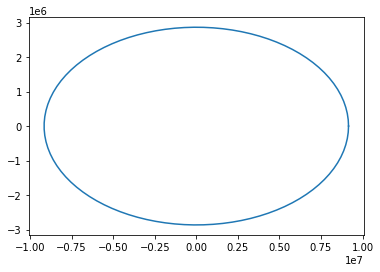

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T_2 = 8720 #T in s
c_2 = 9.448*10**9 #c in m2s-1
gm_2 = 3.986*10**14 #GM in m3s-2
a_2 = (T_2**2*gm_2/(4*math.pi**2))**(1/3) # a in m
b_2 = (c_2*T_2)/(math.pi*a_2) # b in m

print('Halbachse a:',a_2,'m')
print('Halbachse b:',b_2,'m')

length=100

t_2 = np.linspace(0.0,2.0*math.pi, num=length)
print(len(t_2))
x_2 = np.empty(length)
y_2 = np.empty(length)

for i in range(len(t_2)):

    x_2[i] = a_2*math.cos(t_2[i])
    y_2[i] = b_2*math.sin(t_2[i])

plt.plot(x_2,y_2)

#### Lösung Aufgabenteil 2 von Aufgabe 2:

Die Mittlere Anomalie wird folgendermassen bestimmt, wobei $n = 2 \pi / T$ ist:

$$ M(t) = n \cdot (t-t_0) $$

Daraus lässt sich die exzentrische Anomalie bestimen:

$$ E = M + e \sin E $$

Und schlussendlich die wahre Anomalie:

$$\tan \frac{\nu}{2} = \sqrt{\frac{1+e}{1-e}}\cdot \tan \frac{E}{2} $$

Im allgemeinen gilt für die Exzentrizität für Ellipsen folgende Gleichung:

$$ e = \sqrt{1-\frac{b^2}{a^2}}$$

Die Kepler-Gleichung für exzentrische Anomalie muss iterativ bestimmt werden. Das heisst, dass wenn nach einer gewissen Anzahl Schritten die exzentrische Anomalie $E$ sich nicht mehr im Wert signifikant ändert. Entweder kann dies via ein Fixpunktverfahren oder durch das Newton'sche Verfahren erreicht werden. Für das Newtonsche Verfahren kann folgende Gleichung verwendet werden:

$$ 0 = E - e \sin{E} - M = F(E) $$
$$ E_{n+1} = E_n - \frac{F(E_n)}{F'(E_n)} = E_n - \frac{E_n - e \sin{E_n}-M}{1-e\cos{E_n}} $$

In [3]:
n_2 = 2*math.pi/T_2 # n in 1/sec
t_2_1 = (2*60+30)*60 # t1 in sec
t_2_0 = (2*60+20)*60 # t2 in sec

M_2 = n_2*(t_2_1-t_2_0) #M in radian
M_2_deg = M_2*180/math.pi #M in degree
print('M:', M_2,'rad')

e_2 = math.sqrt(1-(b_2**2/a_2**2))
print('Eccentricity',e_2)

noi = 8 #number of iterations = noi
E_2 = M_2 #initial E value
print('E initial:', E_2,'rad')

for i in range(noi):
    E_2 = E_2 - (E_2 - e_2*math.sin(E_2)-M_2)/(1-e_2*math.cos(E_2))
    print('E current:', E_2,'rad')

print('E final:', E_2,'rad')

nu_2 = math.acos((math.cos(E_2)-e_2)/(1-e_2*math.cos(E_2)))

print('Wahre Anomalie Nu:',nu_2,'rad')
print('Wahre Anomalie Nu:',nu_2*180/math.pi,'deg')

M: 0.43232926425547613 rad
Eccentricity 0.9498270623596591
E initial: 0.43232926425547613 rad
E current: 3.3252667569515486 rad
E current: 1.7396130632130122 rad
E current: 1.4197064984626393 rad
E current: 1.3632666940064169 rad
E current: 1.3614130207990711 rad
E current: 1.361411031408348 rad
E current: 1.3614110314060572 rad
E current: 1.3614110314060575 rad
E final: 1.3614110314060575 rad
Wahre Anomalie Nu: 2.7504927345257717 rad
Wahre Anomalie Nu: 157.5916252697235 deg


#### Lösung Aufgabenteil 3 von Aufgabe 2:

Der geozentrische Abstand $r(\nu)$ lässt sich folgendermassen bestimmen:

$$ r(\nu) = \frac{p}{1+e\cdot \cos\nu}$$

Die Koordinaten im System der Bahnebene lauten:

$$ x = r \cos \nu $$
$$ y = r \sin \nu $$

beim vorherigen $t_1 = 2^h 30^m$ ergibt sich also:

In [4]:
r_2 = a_2*(1-e_2**2) / (1+e_2*math.cos(nu_2))
x_2 = r_2 * math.cos(nu_2)
y_2 = r_2 * math.sin(nu_2)

print('X-Position:', x_2, 'm')
print('Y-Position', y_2, 'm')

dnudt = 2*math.pi*a_2*b_2/(r_2**2*T_2)

print('Geschwindigkeit',dnudt, 'm/s')

X-Position: -6793948.539262236 m
Y-Position 2801425.3378166384 m
Geschwindigkeit 0.00034988885923470164 m/s


#### Lösung Aufgabe 3

Ähnlich gerechnet wie in Aufgabenteil 2 von Aufgabe 2, wird hier anhand der gegebenen Parameter gesucht, wann der Satelit den nächsten (Perigäum) und fernsten Punkt (Apogäum) in der Ellipsenbahn erreicht wird. Dies bedeutet, wenn die Distanz genau den Halbachsen $b$ und $a$ entsprechen.

Die gegebenen Parameter sind:

$$ T = 2^h 30^m 20^s = 9020^s $$
$$ e = 0.3 $$
$$ t = 16^h 45^m 50^s = 60350^s $$
$$ \nu (t) = 51^° 30' 36'' = 51.51^° = 0.89901977~rad$$

Somit erhält man mittels $\nu$ und $e$ zum gegebenen Zeitpunkt $E$:

$$ E = 2 \cdot \arctan2 \left( \sqrt{\frac{1-e}{1+e}}\cdot \tan \frac{\nu}{2}\right) $$

Ebenso lässt sich durch gegebenes E auch M bestimmen:

$$ M = E - e \sin E $$

$n$ lässt sich durch folgende Gleichung bestimmen, ergo auch $t_0$ consequent:

$$ n = \frac{2 \pi}{T} $$
$$ t_0 = t - \frac{M}{n} = t - \frac{(E- e \sin E) \cdot T}{2\pi}$$

Zum Zeitpunkt $t_0$ ist der Satelit beim Perigäum. $T/2$ in der Zukunft ist der Satelit beim nächsten Apogäum, und nach $T$ in der Zukunft beim Perigäum:

$$ t_{apogee} = t_0 + T/2 $$
$$ t_{perigee} = t_0 + T4 $$

Die Zeit, welche benötigt wird, bis beide Punkte erreicht werden, lässt sich nun einfach berechnen, nämlich durch den Abzug des momentanen Zeitpunkts der Rechnung:

$$ t_{until~apogee} = t_{apogee} - t $$
$$ t_{until~perigee} = t_{perigee} - t $$

In [5]:
T_3 = 9020 #T in s
e_3 = 0.3 #e in []
t_3 = 60350 #t in s
nu_3 = 51.51/180*math.pi #nu in rad

E_3 = 2 * math.atan(math.sqrt((1-e_3)/(1+e_3))*math.tan(nu_3/2))
M_3 = E_3 - e_3 * math.sin(E_3)
t_3_0 = t_3 - M_3*T_3/(2*math.pi)

t_3_apo = t_3_0 + T_3/2
t_3_per = t_3_0 + T_3

print('Time at next Apogee:',t_3_apo,'s')
print('Time at next Perigee:',t_3_per, 's')

t_to_per = t_3_per - t_3
t_to_apo = t_3_apo - t_3

print('Time until reaching next Apogee:',t_to_apo,'s')
print('Time until reaching next Perigee:',t_to_per,'s')

Time at next Apogee: 64154.0542463802 s
Time at next Perigee: 68664.0542463802 s
Time until reaching next Apogee: 3804.0542463801976 s
Time until reaching next Perigee: 8314.054246380198 s


#### Lösung Aufgabe 4

In dieser Aufgabe ist $\omega$, also die Winkelgeschwindigkeit des Sateliten gegeben. Man nehme an, dass $m$ vernachlässigbar klein ist, und dass $GM = 3.986\cdot 10^{14}~m^3/s^2$ beträgt. Es gilt folgende Gleichung:

$$ C = \frac{T^2}{a^3} = \frac{4 \pi^2}{G(m+M)} $$

Es folgt für $a = H+r_{Erde}$$:

$$H = \sqrt[3]{\frac{GM \cdot T^2}{4 \pi^2}} - r_{Erde} $$

Wobei $T = \frac{2\pi}{\omega}$

In [6]:
import math

omega = 7.29*10**(-5) #omega in rad/s
gm_4 = 3.986*10**(14) #GM in m3s-2
r_earth = 6378*1000 #radius earth in m

T_4 = 2*math.pi/omega

H_4 = ((gm_4*T_4**2/(4*math.pi**2))**(1/3) - r_earth)/1000 #H in km

print('Höhe Satelit über Erdoberfläche',H_4,'km')

Höhe Satelit über Erdoberfläche 35794.31216630684 km
